In [35]:
import warnings
warnings.filterwarnings("ignore") # to avoid warnings
import pandas as pd # to insert data set and create dataframe
import numpy as np # for maths operations like mean
df = pd.read_csv('HR_comma_sep.csv') # assigning data set to df
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [36]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [37]:
left = df[df['left']==0]
left.shape

(11428, 10)

In [38]:
newdf = df.drop(columns = ['Department','salary'])
newdf.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<Axes: xlabel='salary'>

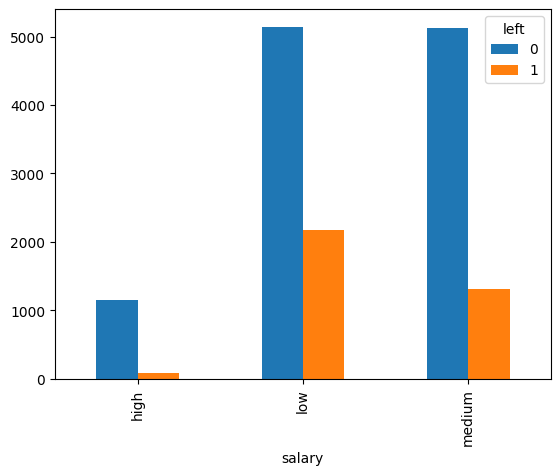

In [39]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

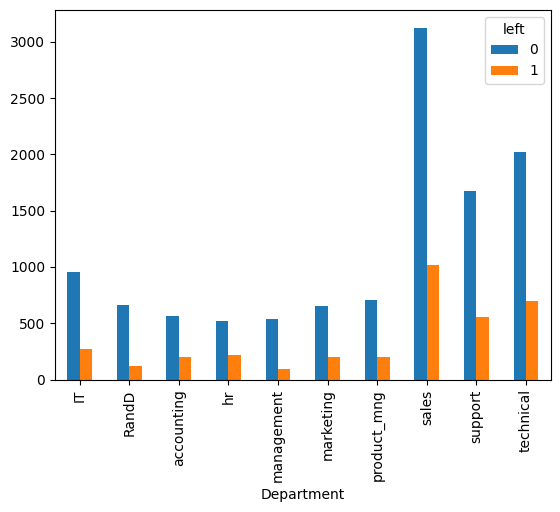

In [40]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [41]:
out = df['left']
out

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [42]:
new=df.drop(columns=['last_evaluation','number_project','time_spend_company','Work_accident','Department'])
print(newdf.to_string())

       satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years
0                    0.38             0.53               2                   157                   3              0     1                      0
1                    0.80             0.86               5                   262                   6              0     1                      0
2                    0.11             0.88               7                   272                   4              0     1                      0
3                    0.72             0.87               5                   223                   5              0     1                      0
4                    0.37             0.52               2                   159                   3              0     1                      0
5                    0.41             0.50               2                   153                   3              0     1         

In [43]:
newdf1 = pd.get_dummies(new,dtype=int)
print(newdf1.to_string())

       satisfaction_level  average_montly_hours  left  promotion_last_5years  salary_high  salary_low  salary_medium
0                    0.38                   157     1                      0            0           1              0
1                    0.80                   262     1                      0            0           0              1
2                    0.11                   272     1                      0            0           0              1
3                    0.72                   223     1                      0            0           1              0
4                    0.37                   159     1                      0            0           1              0
5                    0.41                   153     1                      0            0           1              0
6                    0.10                   247     1                      0            0           1              0
7                    0.92                   259     1           

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(newdf1,out,test_size = 0.2)

In [48]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
model.score(x_test,y_test)

1.0